Mattia Centonze - 4552428

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats

In [65]:
amz1 = pd.read_csv("amazon/amazon_titles_1.csv")
amz2 = pd.read_csv("amazon/amazon_titles_2.csv")
net1 = pd.read_csv("netflix/netflix_titles_1.csv")
net2 = pd.read_csv("netflix/netflix_titles_2.csv")

# Integrazione

In [66]:
amz1.head()
net1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['romance', 'drama', 'sport']",['US'],NaN,tt0075148,8.1,592629.0,86.593,7.784
2,tm47802,Psycho,MOVIE,When larcenous real estate clerk Marion Crane ...,1960,R,109,"['thriller', 'horror', 'drama']",['US'],NaN,tt0054215,8.5,681931.0,31.106,8.446
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,548657.0,22.267,7.804
4,tm25479,The Birds,MOVIE,Chic socialite Melanie Daniels enjoys a passin...,1963,NaN,113,"['horror', 'drama', 'romance', 'european']",['US'],NaN,tt0056869,7.6,193901.0,22.930,7.519


In [67]:
amz2.info()
net2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          

Cancello le colonne che non mi servono da tutte e 4 le tabelle
Riguardo a amazon, date_added occorre essere eliminata poiché ha troppi valori nulli.

In [68]:
amz1 = amz1.drop(['description', 'seasons', 'imdb_id', 'imdb_votes'], axis=1)
amz2 = amz2.drop(['show_id', 'director', 'cast', 'date_added', 'description', 'country', 'duration', 'listed_in'], axis=1)

net1 = net1.drop(['description', 'seasons', 'imdb_id', 'imdb_votes'], axis=1)
net2 = net2.drop(['show_id', 'director', 'cast', 'description', 'country', 'duration', 'listed_in'], axis=1)

Rinomino ogni riga alla colonna type con MOVIE e SHOW per poter unire i due dataset correttamente.
Successivamente unisco le due tabelle con un left join per poter mantenere tutti i valori della tabella1 e aggiungere i valori della tabella2 che non sono presenti nella tabella1.

In [69]:
amz2['type'] = amz2['type'].replace(['Movie', 'TV Show'], ['MOVIE', 'SHOW'])
amz = pd.merge(amz1, amz2, how='left', on=['title', 'release_year', 'type'])

net2['type'] = net2['type'].replace(['Movie', 'TV Show'], ['MOVIE', 'SHOW'])
net = pd.merge(net1, net2, how='left', on=['title', 'release_year', 'type'])

In [70]:
print(amz1.columns)
print(amz2.columns)
print(amz1.shape)
print(amz2.shape)
print(amz.shape)
print("")
print(net1.columns)
print(net2.columns)
print(net1.shape)
print(net2.shape)
print(net.shape)

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'imdb_score', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['type', 'title', 'release_year', 'rating'], dtype='object')
(10839, 11)
(9668, 4)
(10839, 12)

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'imdb_score', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Index(['type', 'title', 'date_added', 'release_year', 'rating'], dtype='object')
(6017, 11)
(8807, 5)
(6017, 13)


In [71]:
print("Amazon:\n", amz.isnull().sum())
print("\nNetflix:\n", net.isnull().sum())

Amazon:
 id                         0
title                      0
type                       0
release_year               0
age_certification       7201
runtime                    0
genres                     0
production_countries       0
imdb_score              1088
tmdb_popularity          565
tmdb_score              2101
rating                  8047
dtype: int64

Netflix:
 id                         0
title                      0
type                       0
release_year               0
age_certification       2661
runtime                    0
genres                     0
production_countries       0
imdb_score               460
tmdb_popularity           78
tmdb_score               224
date_added              3230
rating                  3230
dtype: int64


Riempio i valori nulli di imdb_score, tmdb_popularity, tmdb_score con la media dei valori non nulli.

In [72]:
amz['imdb_score'] = amz['imdb_score'].fillna(amz['imdb_score'].mean())
amz['tmdb_popularity'] = amz['tmdb_popularity'].fillna(amz['tmdb_popularity'].mean())
amz['tmdb_score'] = amz['tmdb_score'].fillna(amz['tmdb_score'].mean())

#-------------------------------------------------------------------------------------------------#

net['imdb_score'] = net['imdb_score'].fillna(net['imdb_score'].mean())
net['tmdb_popularity'] = net['tmdb_popularity'].fillna(net['tmdb_popularity'].mean())
net['tmdb_score'] = net['tmdb_score'].fillna(net['tmdb_score'].mean())

In [73]:
print("Amazon:\n", amz.isnull().sum())
print("\nNetflix:\n", net.isnull().sum())

Amazon:
 id                         0
title                      0
type                       0
release_year               0
age_certification       7201
runtime                    0
genres                     0
production_countries       0
imdb_score                 0
tmdb_popularity            0
tmdb_score                 0
rating                  8047
dtype: int64

Netflix:
 id                         0
title                      0
type                       0
release_year               0
age_certification       2661
runtime                    0
genres                     0
production_countries       0
imdb_score                 0
tmdb_popularity            0
tmdb_score                 0
date_added              3230
rating                  3230
dtype: int64


# Esplorazione 

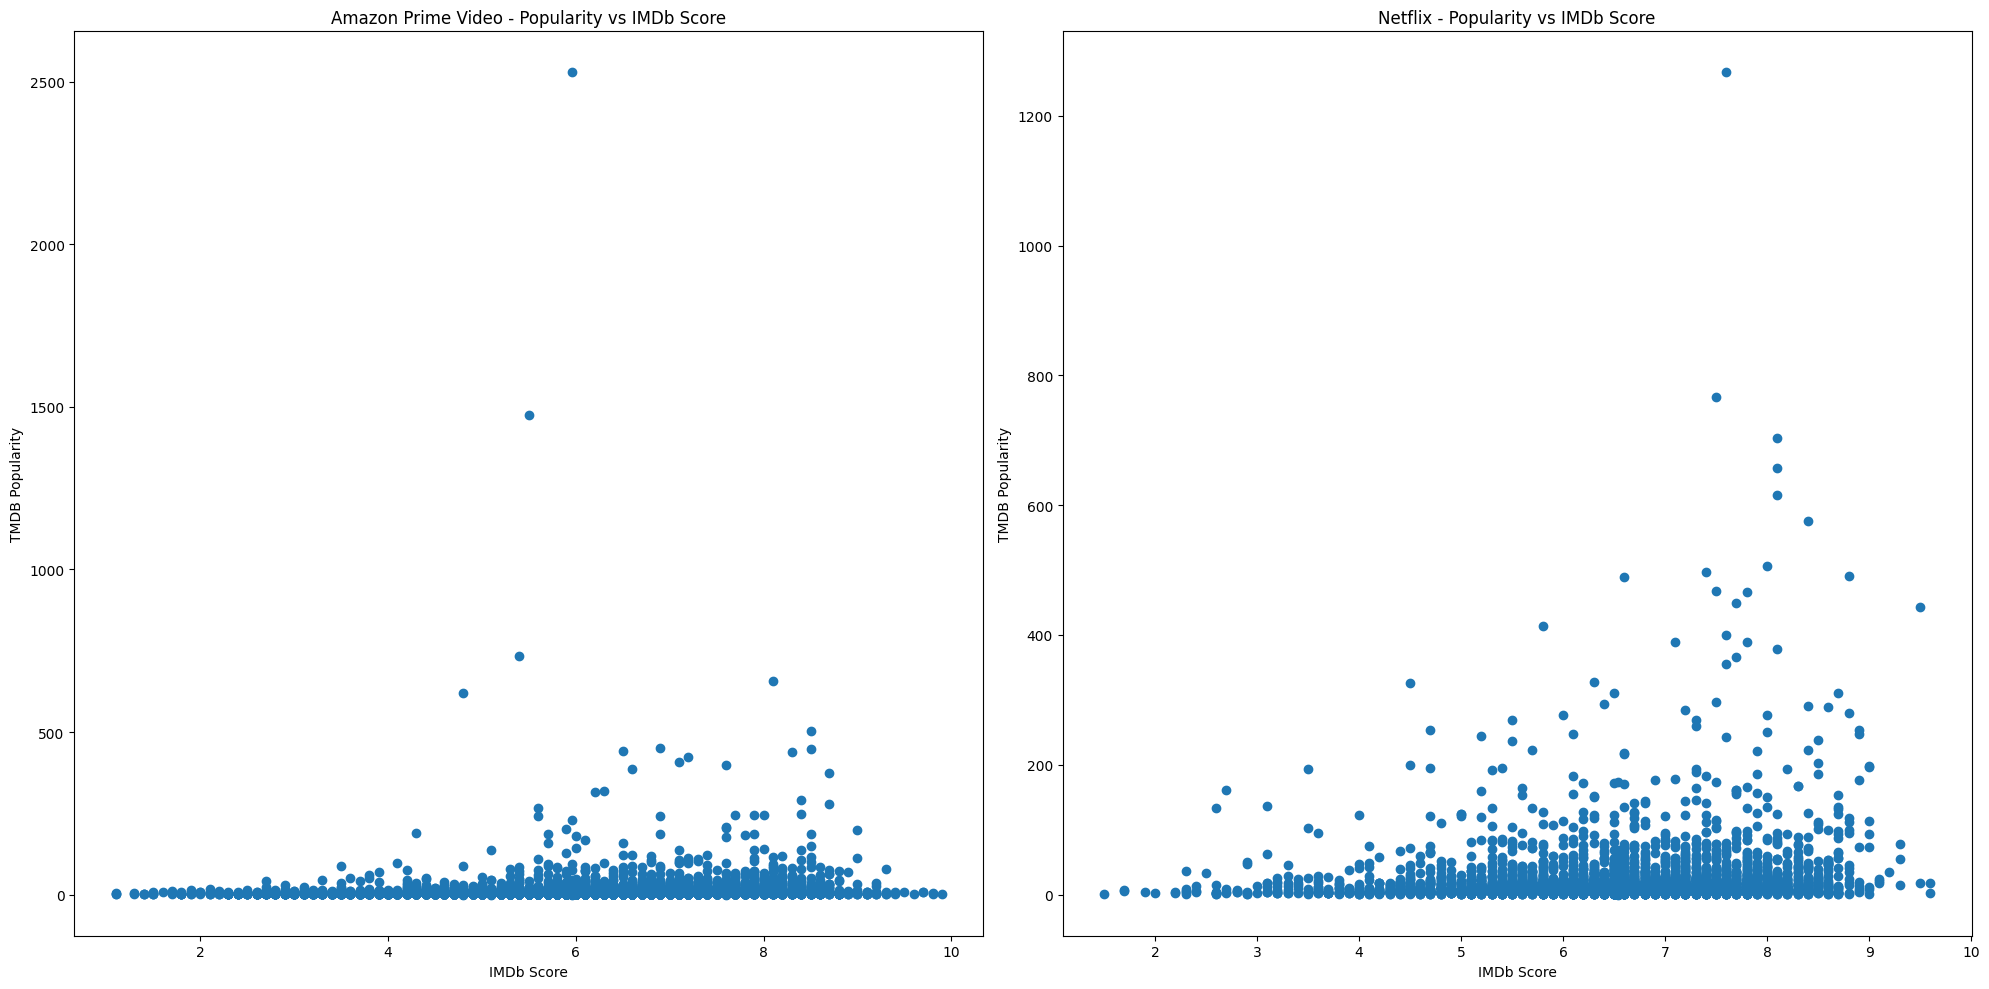

In [74]:
import matplotlib.pyplot as plt

# Creo il grafico a dispersione per Amazon Prime Video
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(amz['imdb_score'], amz['tmdb_popularity'])
ax[0].set_title("Amazon Prime Video - Popularity vs IMDb Score")
ax[0].set_xlabel("IMDb Score")
ax[0].set_ylabel("TMDB Popularity")

# Creo il grafico a dispersione per Netflix
ax[1].scatter(net['imdb_score'], net['tmdb_popularity'])
ax[1].set_title("Netflix - Popularity vs IMDb Score")
ax[1].set_xlabel("IMDb Score")
ax[1].set_ylabel("TMDB Popularity")

plt.tight_layout()
plt.show()


# Metodi predittivi 
Creo un descrittore composto da <br>
• imdb_score <br>
• tmdb_score <br>
• runtime <br>
e lo utilizzo come input per il metodo predittivo supervisionato regressione logistica <br>
per predire tmdb_popularity. <br>
Uso come training i dati di Prime Video, e come test quelli di Netflix.  <br>
 

In [75]:
# quantizzo populartiy
amz['tmdb_popularity'] = pd.qcut(amz['tmdb_popularity'], 3, labels=['low', 'medium', 'high'])
net['tmdb_popularity'] = pd.qcut(net['tmdb_popularity'], 3, labels=['low', 'medium', 'high'])

Accuracy: 0.45


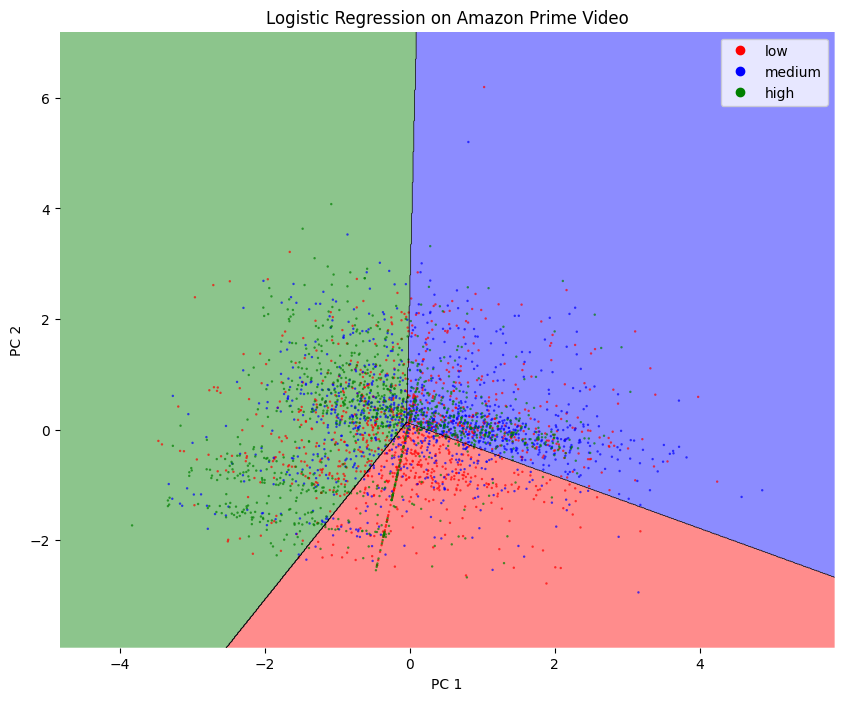

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

# Caricamento dei dati
X = np.column_stack((amz['imdb_score'], amz['tmdb_score'], amz['runtime']))
y = amz['tmdb_popularity'].map({'low': 0, 'medium': 1, 'high': 2})

# Suddivisione in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# normalizzazione dei dati
X_train_std = (X_train_std - X_train_std.mean(axis=0)) / X_train_std.std(axis=0)
X_test_std = (X_test_std - X_test_std.mean(axis=0)) / X_test_std.std(axis=0)

# Riduzione delle dimensioni con PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_pca = pca.transform(X)

# Addestramento del modello di regressione logistica sui dati ridotti
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

# Valutazione delle prestazioni del modello
y_pred = lr.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Plotting dei dati
plt.figure(figsize=(10, 8))

plot_decision_regions(np.array(X_test_pca), np.array(y_test).astype(np.int_), clf=lr, legend=3, scatter_kwargs={'alpha': 0.7, 'edgecolor': 'none', 's':3}, colors='red,blue,green', markers='o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Logistic Regression on Amazon Prime Video')
handles = [plt.Line2D([], [], marker='o', color='red', label='low', linestyle='None'), plt.Line2D([], [], marker='o', color='blue', label='medium', linestyle='None'), plt.Line2D([], [], marker='o', color='green', label='high', linestyle='None')]
plt.legend(handles=handles, loc='upper right')
plt.show()

Accuracy: 0.39


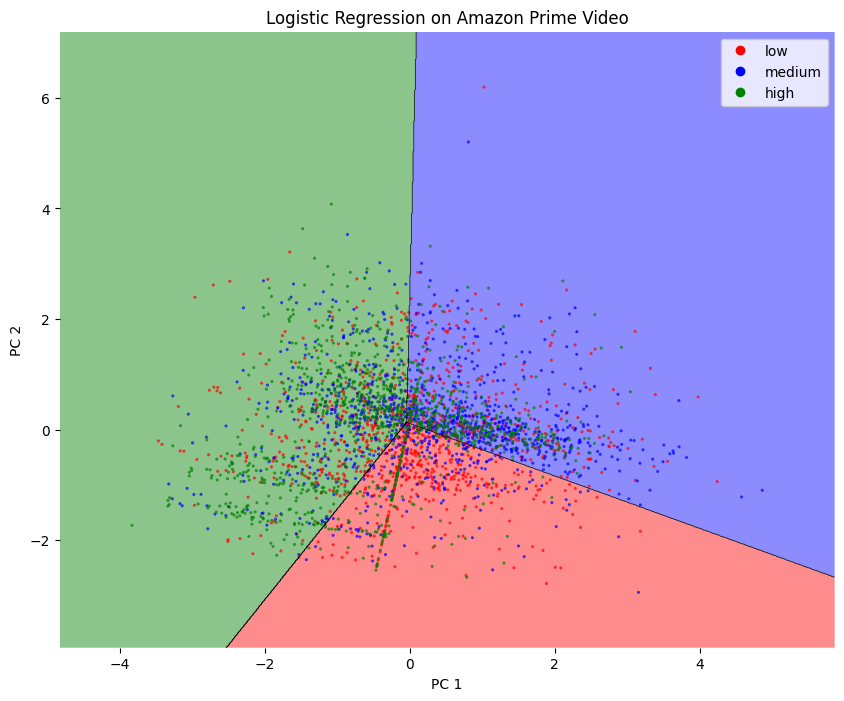

In [77]:
# Caricamento dei dati
X_net = np.column_stack((net['imdb_score'], net['tmdb_score'], net['runtime']))

# Standardizzazione dei dati
X_net_std = scaler.transform(X_net)

# normalizzazione dei dati
X_net_std = (X_net_std - X_net_std.mean(axis=0)) / X_net_std.std(axis=0)

# Proiezione dei dati net_desc nel piano delle due componenti principali
X_net_pca = pca.transform(X_net_std)

# Predizione dei tipi utilizzando il modello addestrato
y_net_pred = lr.predict(X_net_pca)

# Etichette vere del dataset net_desc
y_net_true = net['tmdb_popularity'].map({'low': 0, 'medium': 1, 'high': 2})

# calcoliamo l'accuracy
print('Accuracy: %.2f' % accuracy_score(y_net_true, y_net_pred))

# Visualizzazione grafica delle regioni di decisione
plt.figure(figsize=(10, 8))
plot_decision_regions(np.array(X_test_pca), np.array(y_test).astype(np.int_), clf=lr, legend=3, scatter_kwargs={'alpha': 0.7, 'edgecolor': 'none', 's':5}, colors='red,blue,green,yellow,orange', markers='o')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Logistic Regression on Amazon Prime Video')
handles = [plt.Line2D([], [], marker='o', color='red', label='low', linestyle='None'), plt.Line2D([], [], marker='o', color='blue', label='medium', linestyle='None'), plt.Line2D([], [], marker='o', color='green', label='high', linestyle='None')]
plt.legend(handles=handles, loc='upper right')
plt.show()